In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
x=iris.data[:,2:]
y=iris.target

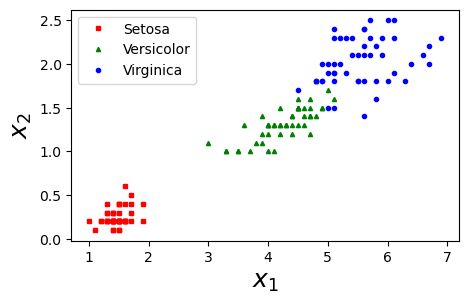

In [3]:
plt.figure(figsize=(5,3))
plt.plot(x[y==0,0],x[y==0,1],'rs',markersize=3,label='Setosa')
plt.plot(x[y==1,0],x[y==1,1],'g^',markersize=3,label='Versicolor')
plt.plot(x[y==2,0],x[y==2,1],'bo',markersize=3,label='Virginica')
plt.legend(loc="upper left")
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18)
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(max_depth=2,random_state=2)
tree_clf.fit(x,y)

DecisionTreeClassifier(max_depth=2, random_state=2)

In [5]:
tree_clf.score(x,y)

0.96

In [6]:
tree_clf.predict([[5,1.5]])

array([1])

In [7]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
tree_clf.feature_importances_

array([0.56199095, 0.43800905])

In [12]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf,x,y,axes=[0,7.5,0,3]):
    x1s=np.linspace(axes[0],axes[1],100)
    x2s=np.linspace(axes[2],axes[3],100)
    x1,x2=np.meshgrid(x1s,x2s)
    x_new=np.c_[x1.ravel(),x2.ravel()]
    y_pred=clf.predict(x_new).reshape(x1.shape)
    custom_cmap=ListedColormap(['red','green','purple'])
    plt.contourf(x1,x2,y_pred,cmap=custom_cmap,alpha=0.2)
    plt.plot(x[y==0,0],x[y==0,1],'rs',markersize=3,label='Setosa')
    plt.plot(x[y==1,0],x[y==1,1],'g^',markersize=3,label='Versicolor')
    plt.plot(x[y==2,0],x[y==2,1],'bo',markersize=3,label='Virginica')
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$",fontsize=18)
    plt.ylabel("$x_2$",fontsize=18)

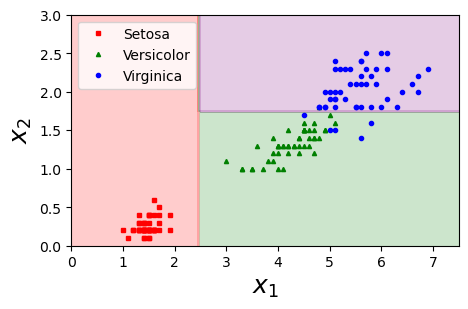

In [13]:
plt.figure(figsize=(5,3))
plot_decision_boundary(tree_clf,x,y)
plt.show()

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
np.random.seed(1)
m=200
x=np.random.rand(m,1)
y=4*(x-0.5)**2+np.random.randn(m,1)/10

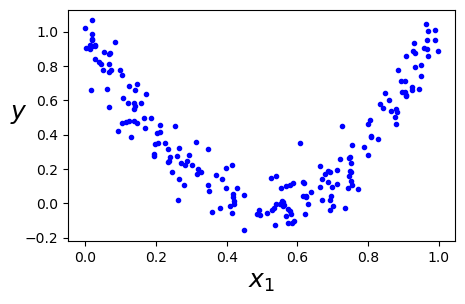

In [17]:
plt.figure(figsize=(5,3))
plt.plot(x,y,'b.')
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$y$',fontsize=18,rotation=0)
plt.show()

In [18]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(max_depth=2,random_state=1)
tree_reg.fit(x,y)

DecisionTreeRegressor(max_depth=2, random_state=1)

In [19]:
tree_reg.score(x,y)

0.8031201321669925

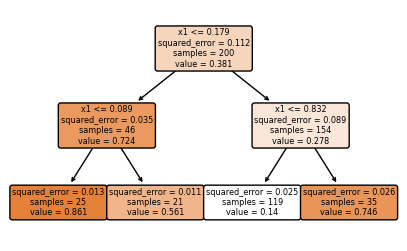

In [20]:
from sklearn import tree
plt.figure(figsize=(5,3))
tree.plot_tree(tree_reg,feature_names=['x1'],rounded=True,filled=True)
plt.savefig('tree_reg.pdf')
plt.show()

In [21]:
tree_reg.predict([[0.4]])

array([0.14048984])

In [22]:
tree_reg.feature_importances_

array([1.])

In [23]:
def plot_regression_predictions(tree_reg,x,y,axes=[0,1,-0.2,1]):
    x1=np.linspace(axes[0],axes[1],500).reshape(-1,1)
    y_pred=tree_reg.predict(x1)
    plt.plot(x,y,'b.')
    plt.plot(x1,y_pred,'r-',linewidth=2,label='$\hat{y}$')
    plt.axis(axes)
    plt.xlabel('$x_1$',fontsize=18)
    plt.xlabel('$y$',fontsize=18,rotation=0)
    plt.legend(loc='upper center',fontsize=14)

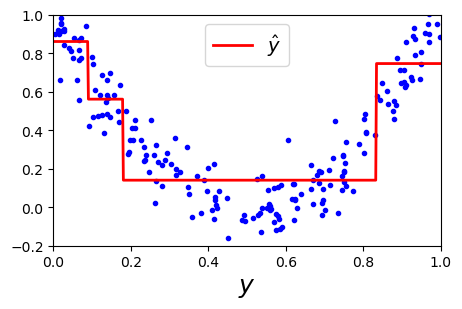

In [26]:
plt.figure(figsize=(5,3))
plot_regression_predictions(tree_reg,x,y)
plt.show()